In [2]:
import tensorflow as tf
import numpy as np
np.random.seed(101)
tf.set_random_seed(101)

In [3]:
# creating  random variables
rand_a = np.random.uniform(0,100,(5,5))
rand_b = np.random.uniform(0,100,(5,1))

In [6]:
#creating placeholders to handle the data
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

In [7]:
# creating an operation
add_op= a+b

In [8]:
# creating another operation
mul_op= a*b

In [16]:
# creating a session and running the graph
with tf.Session() as sess:
    add_result = sess.run(add_op,feed_dict= {a:rand_a,b:rand_b})
    mult_result= sess.run(mul_op,feed_dict={a:rand_a,b:rand_b})
    print(mult_result)

[[5134.644   5674.25     283.12433 1705.4707  6813.8315 ]
 [4341.8125  1598.267   4652.734   3756.8293   988.94635]
 [3207.8113  2038.1029  1052.7742  4546.9805  5588.1157 ]
 [1707.379    614.02527 4434.989   5356.7773  2029.8555 ]
 [3714.0984  2806.6438   262.76764  747.19855 1013.292  ]]


# Example neural Network

In [17]:
n_features=10
n_dense_neurons= 3


In [18]:
# since we don't know the rows coming in(sample size), we give it as none
x= tf.placeholder(tf.float32,(None,n_features))

In [19]:
# Since we will muliply X by W and then these values would be fed to dense layer, shape for W became (10,3)
# we only add biases as many neurons are there in dense layer so for b shape became(3)
W= tf.Variable(tf.random_normal([n_features,n_dense_neurons]))
b = tf.Variable(tf.ones([n_dense_neurons]))

In [20]:
#defining operation
Wx = tf.matmul(x,W)
z= tf.add(Wx,b)
# defining activation function
a= tf.sigmoid(z)

In [21]:
init= tf.global_variables_initializer()

In [23]:
with tf.Session() as sess:
    sess.run(init)
    
    layer_out = sess.run(a,feed_dict={x:np.random.random([1,n_features])})
    print(layer_out)

[[0.19592889 0.8423014  0.36188066]]


# Simple Linear Regression example

In [25]:
#generating random data
x_data= np.linspace(0,10,10)+ np.random.uniform(-1.5,1.5,10)
y_label= np.linspace(0,10,10)+ np.random.uniform(-1.5,1.5,10)

In [34]:
x_data

array([0.5420333 , 1.17575569, 0.85241231, 2.50514314, 4.67005971,
       4.41685654, 6.66701681, 6.69180648, 7.54731409, 9.03483077])

In [35]:
y_label

array([-0.17289561,  2.24387308,  3.57001461,  3.26783558,  4.32780247,
        5.96742265,  6.14049066,  6.63051206,  7.54219188, 10.41297596])

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

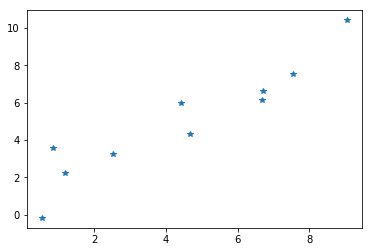

In [28]:
plt.plot(x_data,y_label,'*')

Regression equation
 Y= mx + b

In [29]:
# generate two random numbers and assign them as initial values of m and b. Optimization should find the optimal values for these
np.random.rand(2)

array([0.81226589, 0.67026042])

In [30]:
#declare TF variables
m =tf.Variable(.81)
b= tf.Variable(.67)

In [36]:
# Defining cost function which we will reduce
error = 0
for x,y in zip(x_data,y_label):
    y_hat= m*x + b
    
    error +=(y-y_hat)**2
    

In [37]:
# Defining optimization function to reduce the cost
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train= optimizer.minimize(error)

In [39]:
init= tf.global_variables_initializer()

In [43]:
# in TF, everything happens inside session
with tf.Session() as sess:
    sess.run(init)
    
    training_steps=100
    for i in range(training_steps):
        sess.run(train)
    final_slope,final_intercept = sess.run([m,b])

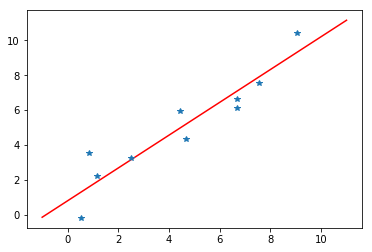

In [44]:
# test the fit
x_test = np.linspace(-1,11,10)
# y= mx + b
y_pred = final_slope*x_test + final_intercept
plt.plot(x_test,y_pred,'r')
plt.plot(x_data,y_label,'*')

#looks like we got pretty good estimations for m and b. We can run more steps to optimize these